**imma gonna pass an image of the face to a cascade classfier and the classifier is gonna recognize the face as shown,i.e it's gonna take the height and width of the image < the region of intrest > and select the "face" part only of the image then after we genrate the image,we're gonnna train that image and train our model:**

**the resized image will be passed to a CNN model which will predict the o/p i.e whether the person is wearing the mask or not!....the cascade classifier selects the part of the image where the face of the person is visible..that's it's speciality!**

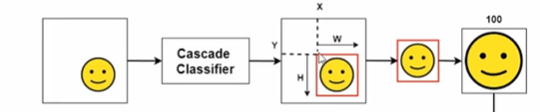

In [45]:
from IPython.display import Image
Image('/content/drive/My Drive/mask dataset/Screenshot (164).png')

**» Now we need to preprocess the data as we saw that cascade classifier will select the part of the region of intrest then we need to preprocess the data as shown below so that we can train our convolution neural network model!...we'll convert the image from RGB to grayscale as shown below!**

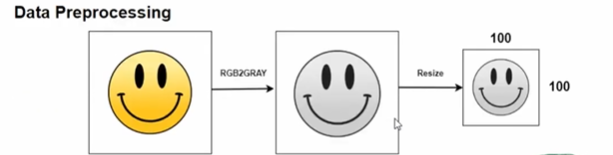

In [46]:
from IPython.display import Image
Image('/content/drive/My Drive/mask dataset/Screenshot (166).png')

In [47]:
import cv2,os

In [48]:
datapath = '/content/drive/My Drive/mask dataset/Training'
categories = os.listdir(datapath)

#label array will be something like 0 and 1
labels = [i for i in range(len(categories))]

#keys as folder names and labels as 0 or 1
label_map = dict(zip(categories,labels))

print(f'label map is {label_map}\n\nlabels list is {labels}')

label map is {'masked': 0, 'not_masked': 1}

labels list is [0, 1]


In [49]:
print(categories)

['masked', 'not_masked']


**» so what we'll do is as we're having the categories and the labels list..we're gonna iterate to each image in the list and convert that into gray scale image....so for that we use the "os.path.join" where in we get the path of the images present...i.e first we'll get the "masked" path then "not masked path" then we'll list out that directory..i.e we'll list out all the elements of that directory..then we'll select the "path" of each image using the "os.path.join"...as the cv2 library can read the image by it's path name!...then we get the imag,...now we'll convert that image into a gray scale image by using the cv2.COLORCVT and convert the image to gray scale..then we'll resize the image to 100 X 100 ...and append all the images into the data folder and categories into the label folder...then we'll normalize each image as the neural network can work with numbers in b/w <0 and 1>..then we'll resize the image again as per the keras rules...then we're done**

In [50]:
folder_path = os.path.join(datapath,'masked')
img_names = os.listdir(folder_path)
#img_names
img_path = [os.path.join(folder_path,i) for i in img_names]
img_path
img = cv2.imread(img_path[0])

In [51]:
img_size = 224
data = []
target = []

for i in categories:
  folder_path1 =  os.path.join(datapath,i)
  img_names = os.listdir(folder_path1)

  for img in img_names:
    #selecting the path of the selected images
    
    img_path =  os.path.join(folder_path1,img)
    #reading the image with CV2

    img = cv2.imread(img_path)

    try:

      gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

      resized = cv2.resize(gray,(224,224))

      data.append(resized)
      target.append(label_map[i])

    except Exception as e:
      print('Exception',e)

In [52]:
data

[array([[ 53, 100, 102, ...,  90,  91,  91],
        [ 56, 103, 105, ...,  90,  91,  91],
        [ 60, 106, 108, ...,  91,  91,  91],
        ...,
        [105,  22,  23, ...,  50,  47,  45],
        [104,  21,  22, ...,  51,  47,  45],
        [103,  21,  21, ...,  51,  47,  45]], dtype=uint8),
 array([[255, 255, 255, ..., 163, 163, 234],
        [255, 255, 255, ...,  84,  96, 184],
        [255, 255, 255, ...,  83,  99, 190],
        ...,
        [255, 255, 255, ..., 169, 163, 169],
        [255, 255, 255, ..., 186, 190, 219],
        [255, 255, 255, ..., 194, 181, 203]], dtype=uint8),
 array([[222, 222, 221, ..., 223, 223, 223],
        [224, 223, 222, ..., 224, 224, 224],
        [225, 225, 224, ..., 226, 226, 226],
        ...,
        [ 90, 100,  80, ...,  94,  95,  95],
        [ 18,  69,  64, ...,  96,  97,  97],
        [ 48,  89,  65, ...,  90,  89,  89]], dtype=uint8),
 array([[156, 152, 148, ...,  56,  55,  55],
        [194, 185, 172, ...,  58,  57,  57],
        [246, 23

In [53]:
import numpy as np
from keras.utils import np_utils

In [54]:
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],224,224,1))
target= np.array(target)
new_target = np_utils.to_categorical(target)

In [55]:
data.shape

(727, 224, 224, 1)

In [56]:
np.save('data',data)
np.save('target',new_target)

In [57]:
data = np.load('/content/data.npy')
target = np.load('/content/target.npy')


In [60]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

In [61]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape = [224,224,1]))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1024,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(2,activation = 'softmax'))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 106, 106, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 53, 53, 64)       

In [72]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.3)

In [73]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [74]:
r = model.fit(x = train_data,y = train_target,epochs = 50,validation_split=0.2)

Epoch 1/50
13/13 [==============================] - 6s 451ms/step - loss: 0.3381 - accuracy: 0.9261 - val_loss: 0.8723 - val_accuracy: 0.7863
Epoch 2/50
13/13 [==============================] - 4s 302ms/step - loss: 0.0859 - accuracy: 0.9680 - val_loss: 1.1178 - val_accuracy: 0.5649
Epoch 3/50
13/13 [==============================] - 4s 302ms/step - loss: 0.0555 - accuracy: 0.9754 - val_loss: 0.6835 - val_accuracy: 0.7481
Epoch 4/50
13/13 [==============================] - 4s 302ms/step - loss: 0.0500 - accuracy: 0.9852 - val_loss: 0.8681 - val_accuracy: 0.7481
Epoch 5/50
13/13 [==============================] - 4s 303ms/step - loss: 0.0358 - accuracy: 0.9852 - val_loss: 2.5198 - val_accuracy: 0.5038
Epoch 6/50
13/13 [==============================] - 4s 302ms/step - loss: 0.0301 - accuracy: 0.9852 - val_loss: 0.7984 - val_accuracy: 0.6718
Epoch 7/50
13/13 [==============================] - 4s 303ms/step - loss: 0.0450 - accuracy: 0.9852 - val_loss: 1.1967 - val_accuracy: 0.7252
Epoch 

In [75]:
import matplotlib.pyplot as plt


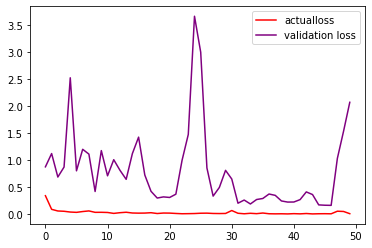

In [76]:
plt.plot(r.history['loss'],label = 'actualloss',color = 'red')
plt.plot(r.history['val_loss'],label = 'validation loss',color=  'purple')
plt.legend()
plt.show()

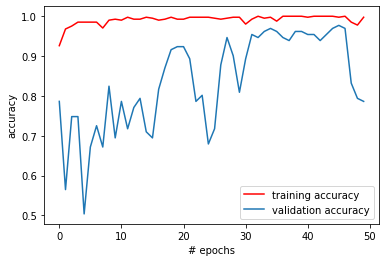

In [77]:
plt.plot(r.history['accuracy'],'r',label='training accuracy')
plt.plot(r.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [78]:
print(model.evaluate(test_data,test_target))

7/7 [==============================] - 1s 195ms/step - loss: 2.6027 - accuracy: 0.7260
[2.6027350425720215, 0.7260273694992065]


In [79]:
model.save('maskpredictor1.h5')